<center>
<h1> График Бланда-Альтмана </h1>
<h2>(Bland–Altman plot) </h2>
<center>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

### Part 1: Коэфициент корреляции Пирсона

$$ r = \frac {\sum {(x_i - \bar{x})*(y_i - \bar{y})}} {\sqrt{{\sum {(x_i - \bar{x})^2}* \sum {(y_i - \bar{y})^2}}}}  $$

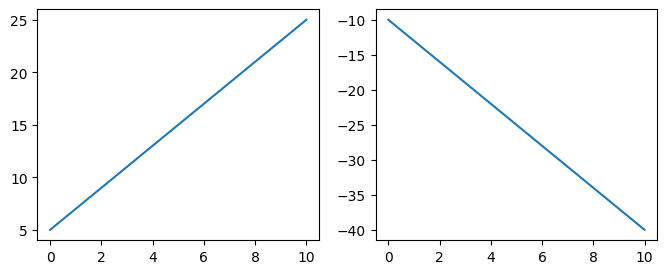

In [2]:
def Pearson (): 
    x = np.linspace (0,10,100)
    y = 2*x + 5
    x_1 = np.linspace (0,10,100)
    y_1 = -3*x_1 - 10
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    ax[0].plot(x,y)
    ax[1].plot (x_1, y_1)

    plt.show()
Pearson()

1) $$ y = 2*x + 5 $$
2) $$ -3*x_1 - 10 $$

### Part 2: Суть графика Бланда-Альтмана

**Суть метода:** *Мы анализируем не то, как методы коррелируют (движутся вместе), а то, насколько они «отклоняются друг от друга» (какова разница между значениями одного и другого).*

Есть набор значений, снятых прибором 1: [x_0, x_1, ... x_n]  
  
Есть набор значений, снятых прибором 2: [y_0, y_1, ... y_n]  
  
**Ось Y:** разность i-ых значений прибора 1 и прибора 2 
$$Diff_i = x_i - y_i$$
**Ось Х:** среднее i-ых значений прибора 1 и прибора 2
$$Mean_i = \frac {x_i - y_i}{2}$$

In [3]:
# Генерируем данные для графика
np.random.seed(99)
# генерируем данные, снятые прибором 1
data_list_1 = np.random.uniform(5, 10, 20)
print('data_list_1 =', data_list_1)
print('\n')
# данные, снятые прибором 2
data_list_2 = np.random.uniform(5, 10, 20)
print('data_list_2 =', data_list_2)
print('\n')
# данные снятые прибором 3
data_list_1_noise = data_list_1 + np.random.rand (20)
print ('data_list_1_noise =',data_list_1_noise)

data_list_1 = [8.36139279 7.440392   9.12747587 5.15723194 9.04024982 7.8280871
 6.48811249 5.2334786  9.953137   5.03412867 8.84896514 8.7338355
 6.88719468 7.47073726 9.64474196 6.97727022 9.86978148 7.62207358
 5.46806547 9.06654206]


data_list_2 = [6.05843393 7.77172892 6.46134558 9.0807118  9.14021283 6.10788686
 8.22417351 5.47590811 7.05831619 5.48432631 5.72005499 6.06098088
 7.38328077 5.38806918 6.17521891 5.03276501 9.49322094 7.76117213
 5.83773314 9.64439092]


data_list_1_noise = [ 8.90348049  7.48215053  9.65235271  5.79737448  9.84090798  8.66300595
  6.74074472  6.20175212 10.41937513  5.29821984  9.39834356  9.11116929
  7.09092303  8.38619976 10.58391938  7.81476381 10.30257082  8.33818653
  6.31940946  9.14558875]


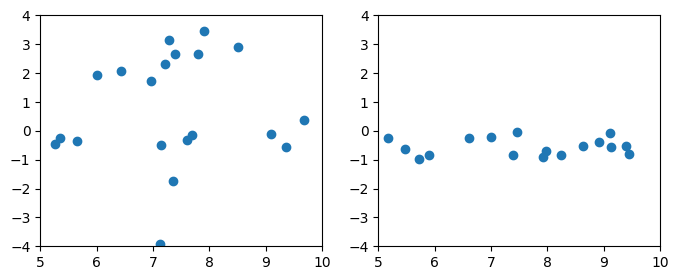

In [4]:
# считаем значени для осей
# сравнение значений приборов 1 и 2
mean_1_2 = (data_list_1 + data_list_2)/2
diff_1_2 = data_list_1 - data_list_2
# сравнение значений приборов 1 и 3
mean_1_3 = (data_list_1 + data_list_1_noise)/2
diff_1_3 = data_list_1 - data_list_1_noise

# сам график
fig, ax = plt.subplots (1,2, figsize = (8,3))
ax[0].scatter (mean_1_2, diff_1_2)
ax[1].scatter (mean_1_3, diff_1_3)
ax[0].set(xlim = (5, 10), ylim = (-4, 4))
ax[1].set(xlim = (5, 10), ylim = (-4, 4))
plt.show()

### Part 3: На какие показатели на графике смотреть?

1) Систематическая ошибка - Bias ("Средняя разность"): $$ \bar{diff} = \frac{\sum(diff_i)}{n} $$
2) LoA (Limits of Agreement): $$ LoA = \bar{d} \pm 1.96*σ $$

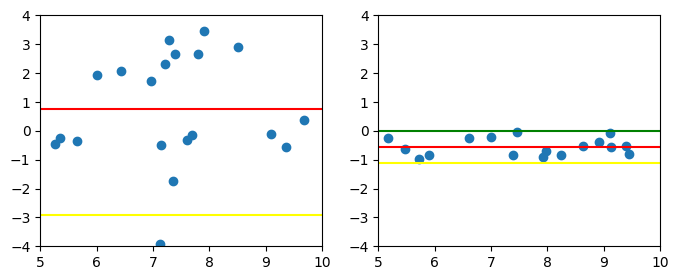

In [5]:
# считаем средние разностей и добавляем в график

# сам график
fig, ax = plt.subplots (1,2, figsize = (8,3))
ax[0].scatter (mean_1_2, diff_1_2)
ax[1].scatter (mean_1_3, diff_1_3)
ax[0].set(xlim = (5, 10), ylim = (-4, 4))
ax[1].set(xlim = (5, 10), ylim = (-4, 4))

mean_diff_1_2 = np.mean (diff_1_2)
mean_diff_1_3 = np.mean (diff_1_3)
ax[0].axhline(y = mean_diff_1_2, color = 'red')
ax[1].axhline(y = mean_diff_1_3, color = 'red')

# считаем LoA
# сначала стандартные отклонения:
std_1 = np.std (diff_1_2)
std_2 = np.std (diff_1_3)

loa_1_up = mean_diff_1_2 + 1.96 * std_1
loa_1_down = mean_diff_1_2 - 1.96 * std_1
loa_2_up = mean_diff_1_3 + 1.96 *std_2
loa_2_down = mean_diff_1_3 - 1.96 * std_2
ax[0].axhline(y = loa_1_up, color = 'green')
ax[1].axhline(y = loa_2_up, color = 'green')
ax[0].axhline(y = loa_1_down, color = 'yellow')
ax[1].axhline(y = loa_2_down, color = 'yellow')

plt.show()